In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout,Flatten, BatchNormalization
from tensorflow.keras import backend as k


In [2]:
img_width,img_height = 224,224

In [3]:
train_data_dir = 'v_data/train'
test_data_dir = 'v_data/test'
n_train = 400
n_val = 100
epochs = 8
batch_size = 16

In [4]:
if k.image_data_format() == 'channel_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)


In [5]:
model = Sequential()
model.add(Conv2D(32, (2,2),activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [7]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode='binary'
    )

Found 400 images belonging to 2 classes.


In [9]:
val_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode ='binary'
    )

Found 100 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=n_train // batch_size,
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = n_val // batch_size
    )

C:\Users\Admin\AppData\Local\Temp\ipykernel_8132\3880542897.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/8
25/25 [==============================] - 24s 810ms/step - loss: 38.2841 - accuracy: 0.5600 - val_loss: 0.4284 - val_accuracy: 0.8021
Epoch 2/8
25/25 [==============================] - 20s 799ms/step - loss: 0.5965 - accuracy: 0.6800 - val_loss: 0.4995 - val_accuracy: 0.8438
Epoch 3/8
25/25 [==============================] - 21s 863ms/step - loss: 0.5052 - accuracy: 0.7325 - val_loss: 0.4776 - val_accuracy: 0.8229
Epoch 4/8
25/25 [==============================] - 23s 917ms/step - loss: 0.4303 - accuracy: 0.7825 - val_loss: 0.3301 - val_accuracy: 0.8854
Epoch 5/8
25/25 [==============================] - 26s 1s/step - loss: 0.3440 - accuracy: 0.8250 - val_loss: 0.3201 - val_accuracy: 0.8750
Epoch 6/8
25/25 [==============================] - 24s 939ms/step - loss: 0.3021 - accuracy: 0.8675 - val_loss: 0.2877 - val_accuracy: 0.8646
Epoch 7/8
25/25 [==============================] - 22s 868ms/step - loss: 0.2836 - accuracy: 0.8725 - val_loss: 0.3273 - val_accuracy: 0.8542
Epoch 8/

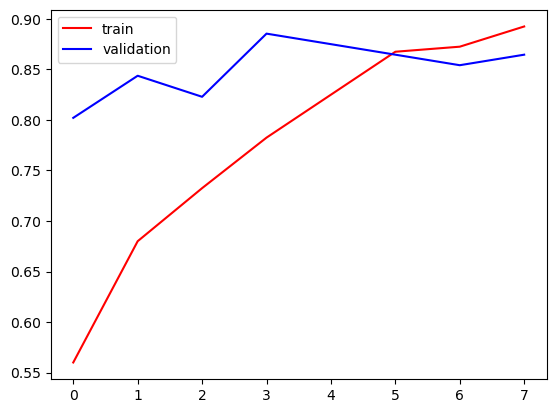

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import load_img

In [13]:
img = load_img('v_data/test/planes/14.jpg',target_size=(224,224))

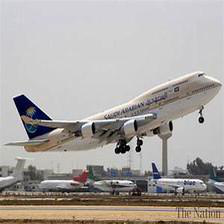

In [14]:
img

In [15]:
import numpy as np

In [16]:
img_array = np.array(img)

In [17]:
img_array

array([[[216, 217, 222],
        [214, 215, 220],
        [211, 212, 217],
        ...,
        [211, 210, 216],
        [213, 212, 218],
        [215, 214, 220]],

       [[215, 216, 221],
        [213, 214, 219],
        [210, 211, 216],
        ...,
        [207, 206, 212],
        [209, 208, 214],
        [211, 210, 216]],

       [[214, 215, 220],
        [211, 212, 217],
        [209, 210, 215],
        ...,
        [205, 204, 210],
        [207, 206, 212],
        [209, 208, 214]],

       ...,

       [[ 67,  40,  11],
        [ 71,  44,  15],
        [ 77,  50,  21],
        ...,
        [202, 180, 159],
        [193, 171, 150],
        [190, 168, 147]],

       [[ 95,  64,  33],
        [ 85,  54,  23],
        [ 88,  57,  26],
        ...,
        [185, 166, 133],
        [189, 170, 137],
        [190, 171, 138]],

       [[149, 118,  87],
        [137, 106,  75],
        [134, 103,  72],
        ...,
        [154, 139,  96],
        [173, 158, 115],
        [182, 167, 124]]

In [18]:
img_array = img_array.reshape(1,224,224,3)

In [19]:
img_array

array([[[[216, 217, 222],
         [214, 215, 220],
         [211, 212, 217],
         ...,
         [211, 210, 216],
         [213, 212, 218],
         [215, 214, 220]],

        [[215, 216, 221],
         [213, 214, 219],
         [210, 211, 216],
         ...,
         [207, 206, 212],
         [209, 208, 214],
         [211, 210, 216]],

        [[214, 215, 220],
         [211, 212, 217],
         [209, 210, 215],
         ...,
         [205, 204, 210],
         [207, 206, 212],
         [209, 208, 214]],

        ...,

        [[ 67,  40,  11],
         [ 71,  44,  15],
         [ 77,  50,  21],
         ...,
         [202, 180, 159],
         [193, 171, 150],
         [190, 168, 147]],

        [[ 95,  64,  33],
         [ 85,  54,  23],
         [ 88,  57,  26],
         ...,
         [185, 166, 133],
         [189, 170, 137],
         [190, 171, 138]],

        [[149, 118,  87],
         [137, 106,  75],
         [134, 103,  72],
         ...,
         [154, 139,  96],
        

In [20]:
labels = model.predict(img_array)

1/1 [==============================] - 0s 385ms/step


In [21]:
labels[0][0]

0.9833177

In [22]:
if labels[0][0]>=0.5:
    print('planes')
else:
    print('cars')

planes


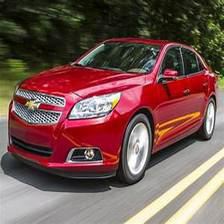

In [23]:
img = load_img('v_data/train/cars/182.jpg',target_size=(224,224))
img

In [24]:
from tensorflow.keras.preprocessing.image import load_img
img2 = load_img('v_data/train/cars/182.jpg',target_size=(224,224))
img2
img_array2 = np.array(img2)
img_array2 = img_array2.reshape(1,224,224,3)
labels = model.predict(img_array2)
print(labels)
if labels[0][0]>=0.5:
    print('planes')
else:
    print('cars')
    

1/1 [==============================] - 0s 173ms/step
[[0.01753897]]
cars


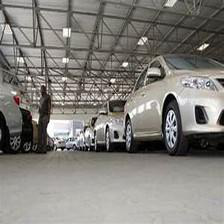

In [25]:
img2 = load_img('v_data/train/cars/165.jpg',target_size=(224,224))
img2

In [26]:
img_array2 = np.array(img2)
img_array2 = img_array2.reshape(1,224,224,3)

In [27]:
labels = model.predict(img_array2)
print(labels)
if labels[0][0]>=0.5:
    print('planes')
else:
    print('cars')

1/1 [==============================] - 0s 98ms/step
[[0.3866311]]
cars
